In [1]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census_df = pd.read_csv(file2)
combined_df = pd.read_csv(file3)

### Shootings and Population Size

In [2]:
combined_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,signs_of_mental_illness,threat_level,flee,body_camera,GEO_ID,2015 Population,2016 Population,2017 Population,2018 Population,Average
0,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,...,False,other,Not fleeing,False,1600000US2079000,389955.0,389927.0,390599.0,389259.0,389935.00
1,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,...,True,attack,Not fleeing,False,1600000US0667000,864816.0,870887.0,884363.0,883305.0,875842.75
2,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,Male,Hispanic,Chandler,Arizona,...,False,attack,Car,False,1600000US0412000,260833.0,247459.0,253448.0,257153.0,254723.25
3,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,Male,White,Stockton,California,...,False,attack,Not fleeing,False,1600000US0675000,305650.0,307057.0,310476.0,311189.0,308593.00
4,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,Male,Black,Columbus,Ohio,...,True,other,Not fleeing,False,1600000US3918000,849067.0,862643.0,881901.0,895877.0,872372.00


#### Calculating lethal shootings per 100,000 people

In [32]:
# Identify the count of lethal shootings in each unique city and state
# combination through the use of groupby
cities_state_grp = combined_df.groupby(['state', 'city'])
counts = cities_state_grp['id'].count()

# Convert to DF
counts_by_city_df = pd.DataFrame({'shooting occurences' : counts})

# Reset index
counts_by_city_df = counts_by_city_df.reset_index()

# Merge DF with average population information
per_capita_df = pd.merge(counts_by_city_df, 
                         combined_df[['city', 'state', 'Average']], 
                         on=('city', 'state'), 
                         how='left')

# Calculate per capita shootings
per_capita_df['shootings per 100,000'] = (per_capita_df['shooting occurences']/
                                     per_capita_df['Average'])*100000

# Restructuring of columns
per_capita_df = per_capita_df[['state', 'city', 'shooting occurences', 'Average', 'shootings per 100,000']]

# Column title format
per_capita_df = per_capita_df.rename(columns={'Average': 'average population'})

# Drop duplicates
per_capita_df = per_capita_df.drop_duplicates()

per_capita_df

,state,city,shooting occurences,average population,"shootings per 100,000"
0,Alabama,Birmingham,8,212595.75,3.763010
8,Alabama,Hoover,2,84958.50,2.354091
10,Alabama,Huntsville,8,195129.00,4.099852
18,Alabama,Mobile,3,191760.75,1.564449
21,Alabama,Montgomery,4,199588.25,2.004126
...,...,...,...,...,...
2436,Wisconsin,Madison,3,253696.50,1.182515
2439,Wisconsin,Milwaukee,14,595647.75,2.350382
2453,Wisconsin,Oshkosh,1,66633.00,1.500758
2454,Wisconsin,Racine,2,77574.50,2.578167


#### Data Shape - Shooting Occurences, Average Population, and Per Capita Shootings

In [4]:
# Data Shape
pop_distrb = per_capita_df.agg(['mean', 'median', 'var', 'std', 'sem'])
pop_distrb
pop_distrb_df = pop_distrb.rename(columns={'mean': 'Mean',
                                          'median': 'Median',
                                          'var': 'Variance',
                                          'std': 'Standard Deviation',
                                          'sem': 'SEM'})
pop_distrb_df

,shooting occurences,average population,"shootings per 100,000"
mean,5.404396,2.236313e+05,2.635402
median,3.000000,1.133172e+05,2.183817
var,72.558571,2.502261e+11,3.640848
std,8.518132,5.002261e+05,1.908101
sem,0.399336,2.345096e+04,0.089453


#### Plotting Relationships

##### Lethal shootings per 100,000 people vs Average Population - All Cities

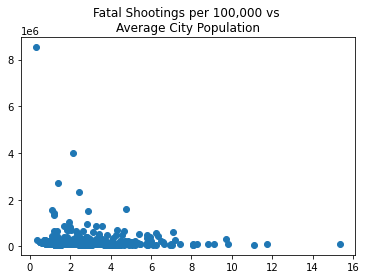

In [5]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])

plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

#### Plotting Relationships - Subdivided by City Population Sizes

##### Lethal shootings per 100,000 people vs Average Population - Cities with Populations Under 580,000

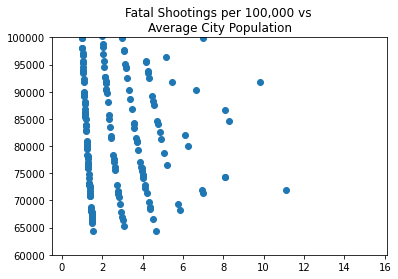

In [47]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(60000,100000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

##### Lethal shootings per 100,000 people vs Average Population - Cities with Populations Under 580,000

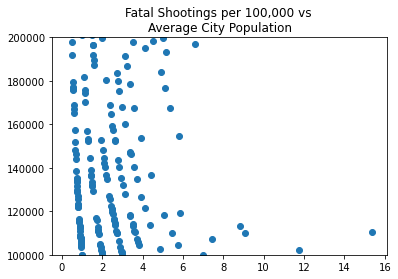

In [46]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(100000,200000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

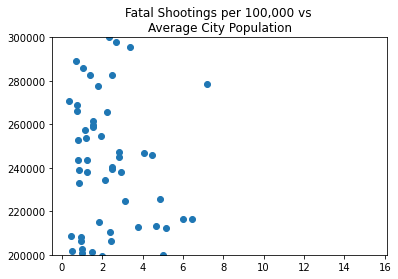

In [49]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(200000,300000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

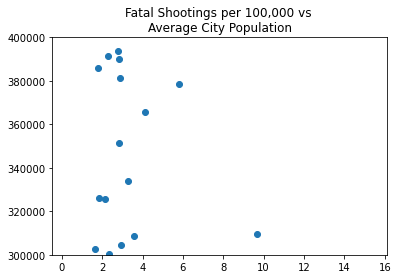

In [50]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(300000,400000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

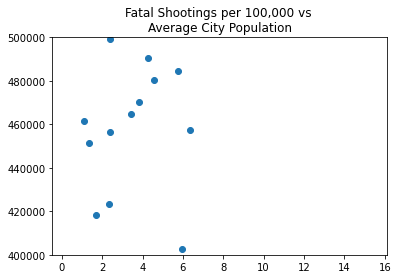

In [54]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(400000,500000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

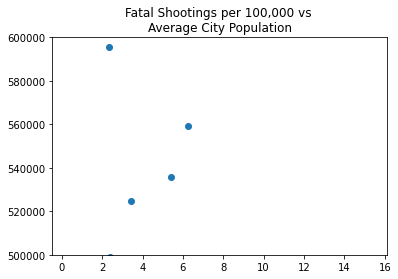

In [53]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(500000,600000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

In [ ]:
##### Lethal shootings per 100,000 people vs Average Population - Cities with Populations between 580,000 and 1,000,000

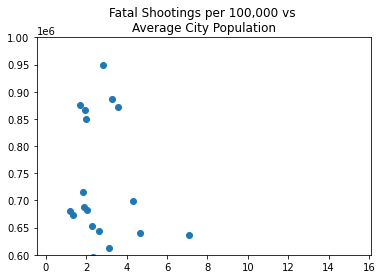

In [55]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(600000,1000000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

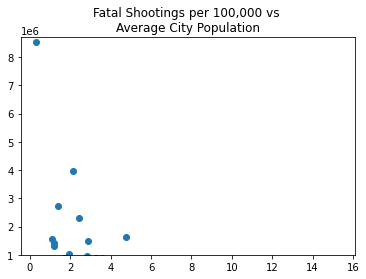

In [56]:
# Plot - Lethal shootings per 100,000 people vs Average Population
# Cities with Populations 1,000,000 and Over
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])
plt.ylim(1000000,8700000)
plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

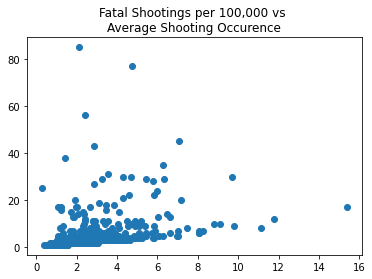

In [6]:
# Plot - Lethal shootings per 100,000 people vs Shooting Occurence
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['shooting occurences'])

plt.title('Fatal Shootings per 100,000 vs \nAverage Shooting Occurence')

plt.show()

In [58]:
# Regression line function
def regsn(df, x, y, xlabel, ylabel, ylim_1, ylim_2):
    df = df.loc[df[x] > 0]
    x_values = df[x]
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='c', alpha=.7)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0.50, 0.10),xycoords='axes fraction', fontsize=14,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim_1, ylim_2)
    plt.title(f'{xlabel} vs {ylabel} for City Populations between {ylim_1} and {ylim_2}')
    # Print and return
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f'images/{xlabel} vs {ylabel} for City Populations between {ylim_1} and {ylim_2}')
    return plt.show()

In [57]:
# Regression Plots

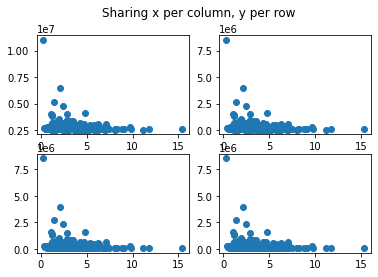

In [20]:
# Multiplot 
x = per_capita_df['shootings per 100,000']
y = per_capita_df['average population']

# Create just a figure and only one subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.suptitle('Sharing x per column, y per row')
ax1.scatter(x, y+2500000)
#ax1.ylim?
ax2.scatter(x, y)
ax3.scatter(x, y)
ax4.scatter(x, y)

# for ax in fig.get_axes():
#     ax.label_outer()
    
    
# ax.set_title('Simple plot')

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('Sharing x per column, y per row')
# ax1.plot(x, y)
# ax2.plot(x, y**2, 'tab:orange')
# ax3.plot(x, -y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

# for ax in fig.get_axes():
#     ax.label_outer()